In [1]:
import xml.etree.ElementTree as ET
import os
import torch
from tqdm import tqdm
from utils.general import download, Path
import matplotlib.pyplot as plt
import itertools
import numpy as np
import random
%matplotlib inline

In [2]:
path = '/data/liuxin/datasets/person_stop'

## stat

In [5]:
clses = []
for xmlfile in os.listdir(os.path.join(path, 'labels_xml')):
    xmlfile = os.path.join(path, 'labels_val', xmlfile)
    in_file = open(xmlfile)
    tree = ET.parse(in_file)
    root = tree.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        clses.append(cls)

In [3]:
clses = []
xml_path = os.path.join(path,'labels_xml')
for image_set in ['train', 'val']:
    for nlist in os.listdir(os.path.join(xml_path, image_set)):
        for xmlfile in os.listdir(os.path.join(xml_path,image_set,nlist)):
            xmlfile = os.path.join(xml_path, image_set, nlist,xmlfile)
            in_file = open(xmlfile)
            tree = ET.parse(in_file)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls = obj.find('name').text
                clses.append(cls)

In [4]:
len(clses)

8515

In [5]:
# clses = itertools.groupby(clses)
clses = list(set(clses))
class_dict = dict(zip(clses, range(len(clses))))
class_dict

{'Stop': 0, 'Person': 1}

## cover

In [18]:
txtsavepath = '/data/liuxin/datasets/person_stop'
#
ftrainval = open(os.path.join(txtsavepath, 'trainval.txt'), 'w')
ftest = open(os.path.join(txtsavepath, 'test.txt'), 'w')
ftrain = open(os.path.join(txtsavepath, 'train.txt'), 'w')
fval = open(os.path.join(txtsavepath, 'val.txt'), 'w')

In [19]:
imagepath = '/data/liuxin/datasets/person_stop/images'
for image_set in ['train', 'val']:
    if image_set == 'train':
        outfile = ftrain
    elif image_set == 'val':
        outfile = fval
    for cls in os.listdir(os.path.join(imagepath, image_set)):
        for nlist in os.listdir(os.path.join(imagepath, image_set, cls)):
            # name = './' + totaljsons[i].split('/',5)[-1].replace('jsons','images').replace('.json`','.jpg') + '\n'
            name = './images/' + image_set+'/'+cls+'/'+nlist + '\n'
            outfile.write(name)

In [ ]:
for root, dirs, files in os.walk(file_dir):
    # name = './' + totaljsons[i].split('/',5)[-1].replace('jsons','images').replace('.json`','.jpg') + '\n'
    name = './images/' + f'{image_set}/'+nlist + '\n'
    ftrain.write(name)

In [49]:
for image_set in ['train']:
    for nlist in os.listdir(os.path.join(path, f'images_{image_set}')):
        # name = './' + totaljsons[i].split('/',5)[-1].replace('jsons','images').replace('.json`','.jpg') + '\n'
        name = './images/' + f'{image_set}/'+nlist + '\n'
        ftrain.write(name)
for image_set in ['val']:
    for nlist in os.listdir(os.path.join(path, f'images_{image_set}')):
        # name = './' + totaljsons[i].split('/',5)[-1].replace('jsons','images').replace('.json`','.jpg') + '\n'
        name = './images/' + f'{image_set}/'+nlist + '\n'
        fval.write(name)

for image_set in ['train', 'val']:
    for nlist in os.listdir(os.path.join(path, f'images_{image_set}')):
        # name = './' + totaljsons[i].split('/',5)[-1].replace('jsons','images').replace('.json`','.jpg') + '\n'
        name = './images/' + f'{image_set}/'+nlist + '\n'
        ftrainval.write(name)

ftrain.close()
ftrainval.close()
fval.close()
ftest.close()

In [ ]:
./images/train2017/000000298197.jpg

In [6]:
def convert_label(path, lb_path, xmlfile, image_id):
    '''
    path: base path
    lb_path: out_label
    '''
    def convert_box(size, box):
        dw, dh = 1. / size[0], 1. / size[1]
        x, y, w, h = (box[0] + box[1]) / 2.0 - 1, (box[2] +
                                                   box[3]) / 2.0 - 1, box[1] - box[0], box[3] - box[2]
        return x * dw, y * dh, w * dw, h * dh

    # in_file = open(path / f'VOC{year}/Annotations/{image_id}.xml')
    # in_file = open(path+f'/labels_train/{image_id}.xml')
    out_file = open(lb_path, 'w')
    tree = ET.parse(xmlfile)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        cls = obj.find('name').text
        # if cls in yaml['names'] and not int(obj.find('difficult').text) == 1:
        xmlbox = obj.find('bndbox')
        bb = convert_box((w, h), [float(xmlbox.find(x).text)
                                  for x in ('xmin', 'xmax', 'ymin', 'ymax')])
        cls_id = class_dict[cls]  # class id
        out_file.write(" ".join([str(a) for a in (cls_id, *bb)]) + '\n')

In [7]:
# Convert
for image_set in ['train', 'val']:
    for nlist in os.listdir(os.path.join(path, f'images_{image_set}')):
        id = nlist[:-4]
        imgs_path = os.path.join(path, f'images_{image_set}', nlist)
        lbs_path = os.path.join(path, f'labels_{image_set}', id+'.xml')
        out_path = os.path.join(
            path, 'labels', f'labels_{image_set}', id+'.txt')
        # convert_label(path, out_path, lbs_path, id)
        try:
            convert_label(path, out_path, lbs_path, id)
        except FileNotFoundError:
            print(id)

FileNotFoundError: [Errno 2] No such file or directory: '/data/liuxin/datasets/person_stop/images_train'

In [9]:
# Convert
imagepath = '/data/liuxin/datasets/person_stop/images'
for image_set in ['train', 'val']:
    for cls in os.listdir(os.path.join(imagepath, image_set)):
        for nlist in os.listdir(os.path.join(imagepath, image_set, cls)):
            id = nlist[:-4]
            lbs_path = os.path.join(path, 'labels_xml', image_set, cls, id+'.xml')
            out_path = os.path.join(
                path, 'labels', image_set, cls, id+'.txt')
            # print(lbs_path,out_path)
            # convert_label(path, out_path, lbs_path, id)
            try:
                convert_label(path, out_path, lbs_path, id)
            except FileNotFoundError:
                print(lbs_path,out_path)
                print(id)

/data/liuxin/datasets/person_stop/labels_xml/val/person_small/BJ_Road5-00370(1).xml /data/liuxin/datasets/person_stop/labels/val/person_small/BJ_Road5-00370(1).txt
BJ_Road5-00370(1)


In [20]:
path

'/data/liuxin/datasets/person_stop'

In [37]:
list1 = [filename[:-4]
         for filename in os.listdir(os.path.join(path, 'labels_val'))]
list2 = [filename[:-4]
         for filename in os.listdir(os.path.join(path, 'images_val'))]

In [17]:
set(list1) - set(list2)

{'BJ_Road5-00297(1)',
 'BJ_Road5-00486(1)',
 'BJ_Road5-00490(1)',
 'BJ_Road5-00495(1)',
 'BJ_Road5-00499(1)',
 'BJ_Road5-00504(1)',
 'BJ_Road5-00855(1)'}

In [38]:
set(list2) - set(list1)

{'BJ_Road5-00370(1)'}

In [39]:
set(list1) - set(list2)

{'20000482(1)'}

In [50]:
class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hex = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
               '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        # 将hex列表中所有hex格式(十六进制)的颜色转换rgb格式的颜色
        self.palette = [self.hex2rgb('#' + c) for c in hex]
        # 颜色个数
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        # 根据输入的index 选择对应的rgb颜色
        c = self.palette[int(i) % self.n]
        # 返回选择的颜色 默认是rgb
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        # hex -> rgb
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))

In [51]:
colors = Colors()

In [53]:
colors(3)

(255, 178, 29)

In [54]:
h = '#FF3838'
tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))

(255, 56, 56)

In [65]:
def plot_one_box(x, im, color=(128, 128, 128), label=None, line_thickness=3):
    """一般会用在detect.py中在nms之后变量每一个预测框，再将每个预测框画在原图上
    使用opencv在原图im上画一个bounding box
    :params x: 预测得到的bounding box  [x1 y1 x2 y2]
    :params im: 原图 要将bounding box画在这个图上  array
    :params color: bounding box线的颜色
    :params labels: 标签上的框框信息  类别 + score
    :params line_thickness: bounding box的线宽
    """
    # check im内存是否连续
    assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to plot_on_box() input image.'
    # tl = 框框的线宽  要么等于line_thickness要么根据原图im长宽信息自适应生成一个
    tl = line_thickness or round(
        0.002 * (im.shape[0] + im.shape[1]) / 2) + 1  # line/font thickness
    # c1 = (x1, y1) = 矩形框的左上角   c2 = (x2, y2) = 矩形框的右下角
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    # cv2.rectangle: 在im上画出框框   c1: start_point(x1, y1)  c2: end_point(x2, y2)
    # 注意: 这里的c1+c2可以是左上角+右下角  也可以是左下角+右上角都可以
    cv2.rectangle(im, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    # 如果label不为空还要在框框上面显示标签label + score
    if label:
        tf = max(tl - 1, 1)  # label字体的线宽 font thickness
        # cv2.getTextSize: 根据输入的label信息计算文本字符串的宽度和高度
        # 0: 文字字体类型  fontScale: 字体缩放系数  thickness: 字体笔画线宽
        # 返回retval 字体的宽高 (width, height), baseLine 相对于最底端文本的 y 坐标
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        # 同上面一样是个画框的步骤  但是线宽thickness=-1表示整个矩形都填充color颜色
        cv2.rectangle(im, c1, c2, color, -1, cv2.LINE_AA)  # filled
        # cv2.putText: 在图片上写文本 这里是在上面这个矩形框里写label + score文本
        # (c1[0], c1[1] - 2)文本左下角坐标  0: 文字样式  fontScale: 字体缩放系数
        # [225, 255, 255]: 文字颜色  thickness: tf字体笔画线宽     lineType: 线样式
        cv2.putText(im, label, (c1[0], c1[1] - 2), 0, tl / 3,
                    [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
    plt.imshow(im)

In [57]:
img = cv2.imread('data/images/bus.jpg')

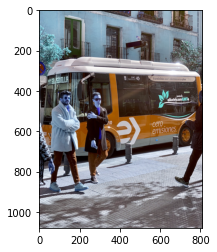

In [62]:
plt.imshow(img)

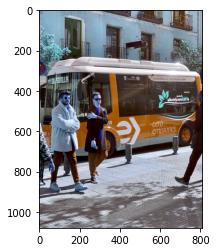

In [67]:
plot_one_box((5, 5, 16, 16), img)

In [13]:
import collections
tmp = collections.Counter('sdfasdf')

In [14]:
tmp

Counter({'s': 2, 'd': 2, 'f': 2, 'a': 1})

get 10%

In [14]:
txtpath = "/data/liuxin/datasets/person_small/train.txt"
basepath = '/data/liuxin/datasets/person_small'

In [7]:
with open(txtpath, "r") as f:
    data = f.readlines()

In [8]:
len(data)

500

In [23]:
ftrain_1 = open(os.path.join(basepath, 'train0.8.txt'), 'w')

In [24]:
keep_p = 0.8
num = len(data)
list = range(num)
tv = int(num * keep_p)
trainval = random.sample(list, tv)

In [25]:
for i in list:
    name = data[i]
    if i in trainval:
        ftrain_1.write(name)
ftrain_1.close()

In [29]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))

In [30]:
print(features[0], labels[0])

tensor([-0.02920,  0.04747], dtype=torch.float64) tensor(3.98203, dtype=torch.float64)


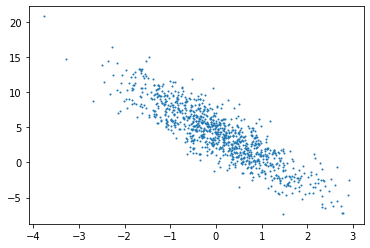

In [32]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);